In [84]:
import os 
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Conv1D, MaxPooling1D
from tensorflow.keras import Model
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping

# Data

In [5]:
local_zip = 'spam-or-not.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [70]:
df = pd.read_csv('/tmp/spam_or_not_spam.csv')
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [32]:
df['label'].value_counts()

0    2500
1     500
Name: label, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
email    2999 non-null object
label    3000 non-null int64
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [34]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2999
Data columns (total 2 columns):
email    2999 non-null object
label    2999 non-null int64
dtypes: int64(1), object(1)
memory usage: 70.3+ KB


# splitting to train set and test set

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(df['email'], df['label'], test_size=0.2)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(2400,) (2400,)
(600,) (600,)


# Converting text to numbers

In [36]:
MAX_VOACB_SIZE = 32000
tokenizer = Tokenizer(num_words=MAX_VOACB_SIZE)
tokenizer.fit_on_texts(X_train)

sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

In [37]:
V = len(tokenizer.word_index)
print(f'Found {V} unique tokens')

Found 30947 unique tokens


In [39]:
tokenizer.word_index

{'number': 1,
 'the': 2,
 'to': 3,
 'of': 4,
 'and': 5,
 'a': 6,
 'in': 7,
 'i': 8,
 'url': 9,
 'is': 10,
 'that': 11,
 'you': 12,
 'it': 13,
 'for': 14,
 'this': 15,
 'on': 16,
 's': 17,
 'with': 18,
 'be': 19,
 'have': 20,
 'from': 21,
 'not': 22,
 'are': 23,
 't': 24,
 'as': 25,
 'or': 26,
 'your': 27,
 'at': 28,
 'by': 29,
 'if': 30,
 'but': 31,
 'was': 32,
 'we': 33,
 'can': 34,
 'an': 35,
 'all': 36,
 'list': 37,
 'they': 38,
 'will': 39,
 'my': 40,
 'so': 41,
 'has': 42,
 'more': 43,
 'one': 44,
 'do': 45,
 'there': 46,
 'get': 47,
 'just': 48,
 'out': 49,
 'about': 50,
 'no': 51,
 'what': 52,
 'which': 53,
 'our': 54,
 'people': 55,
 'he': 56,
 'time': 57,
 'would': 58,
 'up': 59,
 'their': 60,
 'only': 61,
 'like': 62,
 'use': 63,
 'who': 64,
 'any': 65,
 'free': 66,
 'new': 67,
 'now': 68,
 'email': 69,
 'me': 70,
 'don': 71,
 'some': 72,
 'when': 73,
 'here': 74,
 'been': 75,
 'other': 76,
 'mail': 77,
 'm': 78,
 'than': 79,
 'how': 80,
 'e': 81,
 'wrote': 82,
 'them': 83,
 

In [38]:
example = 3
X_train.iloc[example]

'i just set up razor and spamassassin but i keep getting this error in my mail log file razorNUMBER check skipped no such file or directory can t call method log on unblessed reference at usr local lib perlNUMBER site_perl NUMBER NUMBER NUMBER razorNUMBER client agent pm line NUMBER i have looked through the archived list and the only thing i have seen about this error is a possible permission problem on the log file i did what it said in the archives basically change the permission on the file but its still no go any other help would be appreciated maybe i m missing something something i forgot to run or do rob this URL email is sponsored by osdn tired of that same old cell phone get a new here for free URL _______________________________________________ razor users mailing list razor users URL URL '

In [40]:
for i in sequence_train[example]:
    print(i, end=' ')

8 48 208 59 172 5 102 31 8 282 369 15 291 7 40 77 372 153 1091 215 2991 51 151 153 26 554 34 24 304 716 372 16 3775 1330 28 451 375 560 1305 269 229 1 1 1 1091 650 922 356 145 1 8 20 1010 156 2 4857 37 5 2 61 256 8 20 420 50 15 291 10 6 384 1996 185 16 2 372 153 8 201 52 13 91 7 2 3586 1925 192 2 1996 16 2 153 31 101 160 51 144 65 76 184 58 19 2226 355 8 78 1615 163 163 8 2992 3 204 26 45 1306 15 9 69 10 285 29 709 620 4 11 129 188 550 213 47 6 67 74 14 66 9 172 111 88 37 172 111 9 9 

In [47]:
for i in sequence_train[example]:
    print(tokenizer.index_word[i], end=' ')

i just set up razor and spamassassin but i keep getting this error in my mail log file razornumber check skipped no such file or directory can t call method log on unblessed reference at usr local lib perlnumber site perl number number number razornumber client agent pm line number i have looked through the archived list and the only thing i have seen about this error is a possible permission problem on the log file i did what it said in the archives basically change the permission on the file but its still no go any other help would be appreciated maybe i m missing something something i forgot to run or do rob this url email is sponsored by osdn tired of that same old cell phone get a new here for free url razor users mailing list razor users url url 

In [48]:
text1 = [len(i) for i in sequence_train]
pdtext1 = pd.DataFrame(text1, columns=['len'])
pdtext1

,len
0,29
1,151
2,102
3,144
4,82
...,...
2394,109
2395,77
2396,124
2397,171


In [50]:
pdtext1.describe()

,len
count,2399.000000
mean,235.209254
std,543.872578
min,0.000000
25%,67.000000
50%,135.000000
75%,237.000000
max,13303.000000


In [51]:
pdtext1[(pdtext1['len'] <= 1000)].count()

len    2335
dtype: int64

In [53]:
data_train = pad_sequences(sequence_train, maxlen=1000)
print('Shape of data train tensor:', data_train.shape)

T = data_train.shape[1]

Shape of data train tensor: (2399, 1000)


In [66]:
pd.DataFrame(data_train).head()

881     0
1488    0
1669    0
1576    0
863     0
       ..
149     0
721     0
431     0
803     0
2524    1
Name: label, Length: 2399, dtype: int64

In [57]:
data_test = pad_sequences(sequence_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (600, 1000)


# RNN

In [61]:
D = 20
M = 15

i = Input(shape=(T,))

x = Embedding(V + 1, D)(i)

x = LSTM(M, return_sequences=True)(x)

x = GlobalMaxPooling1D()(x)

x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [62]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1000, 20)          618960    
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000, 15)          2160      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 621,136
Trainable params: 621,136
Non-trainable params: 0
_________________________________________________________________


In [67]:
my_callbacks_es = EarlyStopping(monitor='val_loss', patience=2)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Training model...')

r = model.fit(
    data_train, 
    Y_train.to_numpy(), 
    epochs=20, 
    validation_data=(data_test, Y_test.to_numpy()),
    callbacks=[my_callbacks_es]
)

Training model...
Train on 2399 samples, validate on 600 samples
Epoch 1/20
2399/2399 [==============================] - 98s 41ms/sample - loss: 0.5542 - accuracy: 0.8195 - val_loss: 0.4395 - val_accuracy: 0.8400
Epoch 2/20
2399/2399 [==============================] - 92s 38ms/sample - loss: 0.4506 - accuracy: 0.8320 - val_loss: 0.4327 - val_accuracy: 0.8400
Epoch 3/20
2399/2399 [==============================] - 88s 37ms/sample - loss: 0.4265 - accuracy: 0.8320 - val_loss: 0.3436 - val_accuracy: 0.8400
Epoch 4/20
2399/2399 [==============================] - 82s 34ms/sample - loss: 0.2657 - accuracy: 0.9033 - val_loss: 0.2086 - val_accuracy: 0.9533
Epoch 5/20
2399/2399 [==============================] - 85s 36ms/sample - loss: 0.1360 - accuracy: 0.9829 - val_loss: 0.1184 - val_accuracy: 0.9800
Epoch 6/20
2399/2399 [==============================] - 84s 35ms/sample - loss: 0.0798 - accuracy: 0.9921 - val_loss: 0.1401 - val_accuracy: 0.9517
Epoch 7/20
2399/2399 [=========================

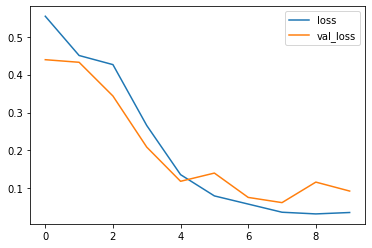

In [73]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.legend()

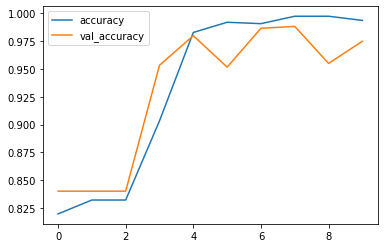

In [75]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')

plt.legend()

In [77]:
model.evaluate(data_test, Y_test.to_numpy())

600/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.09261894417305787, 0.975]

In [78]:
pred = model.predict(data_test) > 0.5
print(f'accuracy {accuracy_score(pred, Y_test)}')

accuracy 0.975


In [82]:
print(classification_report(pred, Y_test, digits=4))

              precision    recall  f1-score   support

       False     0.9802    0.9900    0.9850       499
        True     0.9479    0.9010    0.9239       101

    accuracy                         0.9750       600
   macro avg     0.9640    0.9455    0.9545       600
weighted avg     0.9747    0.9750    0.9747       600



# CNN

In [92]:
D = 20

i = Input(shape=(T,))

x = Embedding(V + 1, D)(i)

x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)

x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)

x = Conv1D(128, 3, activation='relu')(x)

x = GlobalMaxPooling1D()(x)

x = Dense(1, activation='sigmoid')(x)

model2 = Model(i, x)

In [93]:
model2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 1000, 20)          618960    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 998, 32)           1952      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 332, 32)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 330, 64)           6208      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 110, 64)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 108, 128)          2470

In [94]:
my_callbacks_es = EarlyStopping(monitor='val_loss', patience=2)

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Training model...')

r2 = model2.fit(
    data_train, 
    Y_train.to_numpy(), 
    epochs=20, 
    validation_data=(data_test, Y_test.to_numpy()),
    callbacks=[my_callbacks_es]
)

Training model...
Train on 2399 samples, validate on 600 samples
Epoch 1/20
2399/2399 [==============================] - 6s 2ms/sample - loss: 0.4435 - accuracy: 0.8220 - val_loss: 0.3288 - val_accuracy: 0.8400
Epoch 2/20
2399/2399 [==============================] - 5s 2ms/sample - loss: 0.1935 - accuracy: 0.9054 - val_loss: 0.0971 - val_accuracy: 0.9700
Epoch 3/20
2399/2399 [==============================] - 5s 2ms/sample - loss: 0.0220 - accuracy: 0.9942 - val_loss: 0.0399 - val_accuracy: 0.9850
Epoch 4/20
2399/2399 [==============================] - 5s 2ms/sample - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0443 - val_accuracy: 0.9800
Epoch 5/20
2399/2399 [==============================] - 5s 2ms/sample - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0409 - val_accuracy: 0.9833


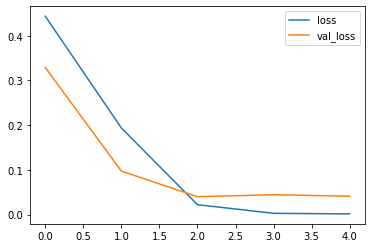

In [95]:
plt.plot(r2.history['loss'], label='loss')
plt.plot(r2.history['val_loss'], label='val_loss')

plt.legend()

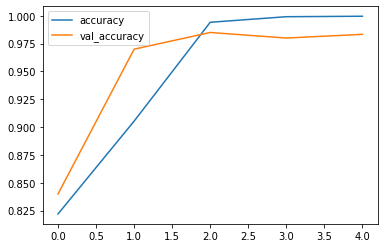

In [96]:
plt.plot(r2.history['accuracy'], label='accuracy')
plt.plot(r2.history['val_accuracy'], label='val_accuracy')

plt.legend()

In [99]:
model.evaluate(data_test, Y_test.to_numpy())

600/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.09261894417305787, 0.975]

In [100]:
pred = model2.predict(data_test) > 0.5
print(f'accuracy {accuracy_score(pred, Y_test)}')

accuracy 0.9833333333333333


In [101]:
print(classification_report(pred, Y_test, digits=4))

              precision    recall  f1-score   support

       False     0.9861    0.9940    0.9900       500
        True     0.9688    0.9300    0.9490       100

    accuracy                         0.9833       600
   macro avg     0.9774    0.9620    0.9695       600
weighted avg     0.9832    0.9833    0.9832       600



# Testing

In [142]:
msg = input('Enter a message: ')

Enter a message: hello there


In [143]:
converted = tokenizer.texts_to_sequences(pd.Series(msg))

for i in converted[0]:
    print(i, end=' ')

1323 46 

In [144]:
for i in converted[0]:
    print(tokenizer.index_word[i], end=' ')

hello there 

In [145]:
data = pad_sequences(converted, maxlen=1000)

In [147]:
model2.predict(data) > 0.5

array([[ True]])